In [1]:
import numpy as np
import pandas as pd 
from matplotlib import style
import matplotlib.pyplot as plt 
import seaborn as sns

style.use("ggplot")

%matplotlib inline

In [2]:
df = pd.read_csv("./data/penguins.csv").dropna()

In [3]:
df.columns

Index(['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass', 'Species'], dtype='object')

In [4]:
df

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [5]:
X_pre = df[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']].values
y = df['Species'].values

In [6]:
species_map = {
    0 : "Adelie",
    1 : "Gentoo",
    2 : "Chinstrap"
}

In [7]:
(
    X_pre.shape,
    y.shape
)

((342, 4), (342,))

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = StandardScaler().fit_transform(X_pre)

## Tensorflow

In [9]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import (models, utils, optimizers)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
tf.random.set_seed(0)

In [11]:
y = utils.to_categorical(y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [17]:
m_samples ,n_features = X_train.shape
_ , n_classes = y_train.shape

In [20]:
hidden_layer_nodes = 10


model = Sequential()
model.add(
    Dense(units=hidden_layer_nodes,input_dim=n_features,activation='relu')
)

model.add(
    Dense(units=hidden_layer_nodes,input_dim=hidden_layer_nodes,activation='relu')
)

model.add(
    Dense(units=n_classes,input_dim=hidden_layer_nodes,activation='softmax')
)

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train,y_train,epochs=1000,batch_size=50,validation_data=(X_test,y_test),verbose=0)

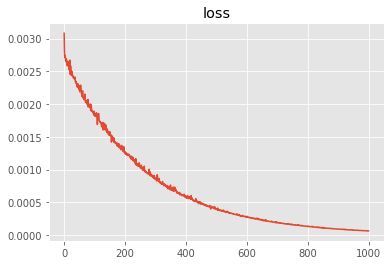

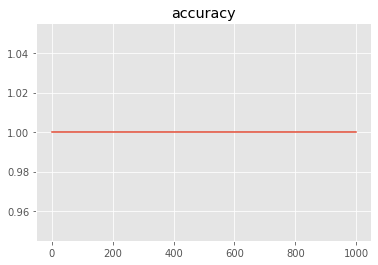

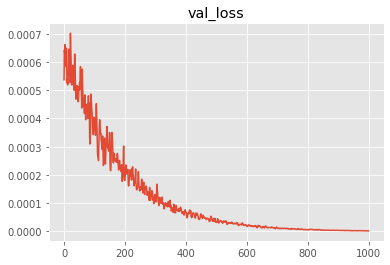

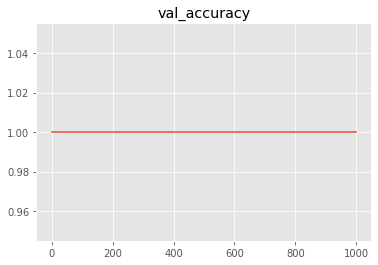

In [35]:
for i in history.history:
    plt.plot(history.history[i])
    plt.title(i)
    plt.show()

In [40]:
model.predict(X_test)

array([[1.00000000e+00, 1.11732993e-17, 4.21249191e-20],
       [8.13306106e-12, 5.56249274e-13, 1.00000000e+00],
       [1.00000000e+00, 2.09529141e-30, 2.03192694e-37],
       [4.67503060e-06, 3.99469684e-07, 9.99994874e-01],
       [1.00000000e+00, 3.23958607e-30, 3.86875466e-36],
       [5.23271964e-13, 2.00305419e-12, 1.00000000e+00],
       [1.34818186e-20, 1.00000000e+00, 2.42922056e-13],
       [1.00000000e+00, 3.72562156e-14, 1.07071639e-13],
       [6.02739998e-27, 1.00000000e+00, 9.85609934e-21],
       [1.00000000e+00, 4.65095224e-21, 1.72067122e-20],
       [1.00000000e+00, 4.03277892e-21, 6.48724499e-24],
       [1.22210029e-19, 1.00000000e+00, 5.60661795e-11],
       [4.38286316e-13, 1.00000000e+00, 2.99527070e-11],
       [1.00000000e+00, 3.60914601e-28, 6.49360653e-32],
       [1.00000000e+00, 3.02694043e-21, 2.67990918e-22],
       [2.99596875e-14, 1.00000000e+00, 7.34978051e-12],
       [2.58736409e-19, 1.00000000e+00, 4.13640069e-16],
       [5.70748260e-25, 1.00000